**INTRODUCTION:**
HELP international wants to categorise the countries using socio-economic and health factors that determine the overall development of the country. Further NGO wants to select Backward countries to help them with raised fund.
In this notebook, I have tried selecting backward countries using Agglomerative Hierarchical Clustering.

# 1.Load libraries and read data



#  1.1 Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


# 1.2 Read the dataset

In [ ]:
country_data = pd.read_csv('../input/unsupervised-learning-on-country-data/Country-data.csv')

# 2. Exploratory Data Analysis


# 2.1 Shape and Head of Data

In [ ]:
print(country_data.shape)
country_data.head()

# 2.2 Missing Values


In [ ]:
country_data.isnull().sum()

No missing values. It is obvious as it is important international data created and entered by professionals.

# 2.3 Datatypes of variables.

In [ ]:
country_data.info()   

we can conclude all data types are in correct format.

# 2.4 Describing the Data

In [ ]:
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

# 2.5 Outliers

Extremely poor or extremely developed countries will be outliers. But we want to select extremely poor/ underdeveloped countries. Therefore not removing outliers.

# 2.6 Correlation Heatmap

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(country_data.corr(),annot=True,cmap='Blues')
plt.show()

# 3. Scalling using standard scaler 

In [ ]:
data = country_data.drop('country', axis=1)
sc=StandardScaler()
data[data.columns] = sc.fit_transform(data[data.columns])


# 4.Principal Component Analysis for Visualization

Principal component analysis is used for Data compression and visualization. Our data has 9 dimensions. It is not easy to plot and visualize it. We can reduce it to 2 dimensions in order to plot it.

We have grouped featues with values directly proportional to development in Pos_features i.e. high values in these features indicate development. Also we have grouped featues with values inversely proportional to development in Neg_features i.e. high value in these features indicate underdevelopment.

We extract one principal component from Pos_features ,store in PC1 and one principal component from Neg_features and store in PC2.


In [ ]:
Pos_features= data[['exports','health','imports','income','gdpp','life_expec']]
Neg_features= data[['child_mort','inflation','total_fer']]
  
pca = PCA(n_components = 1) 
  
PC1 = pca.fit_transform(Pos_features) 
PC2 = pca.fit_transform(Neg_features) 

plt.plot(PC1,PC2,'ro')
plt.xlabel('PC1') 
plt.ylabel('PC2') 

Countries representted by dots on rightside of X-axis are developed countries as they have high value on principal component of Pos_features(PC1) and less value on principal component of Neg_features(PC2). Countries representted by dots on upside of Y-axis are underdeveloped countries as they have high value on principal component of Neg_features(PC2) and less value on principal component of Pos_features(PC1).


In [ ]:
# Creating new datframe combining PC1 and PC2
data1= pd.DataFrame(PC1)
data2= pd.DataFrame(PC2)
pca_data=pd.concat([data1, data2], axis=1)
pca_data.columns= ['PC1','PC2']

# 5. Agglomerative Hierarchical Clustering


There are two types of hierarchical clustering: Divisive and Agglomerative. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

# 5.1 Plotting Dendrogram

In [ ]:
plt.figure(figsize=(50, 12))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(pca_data, method='ward'))

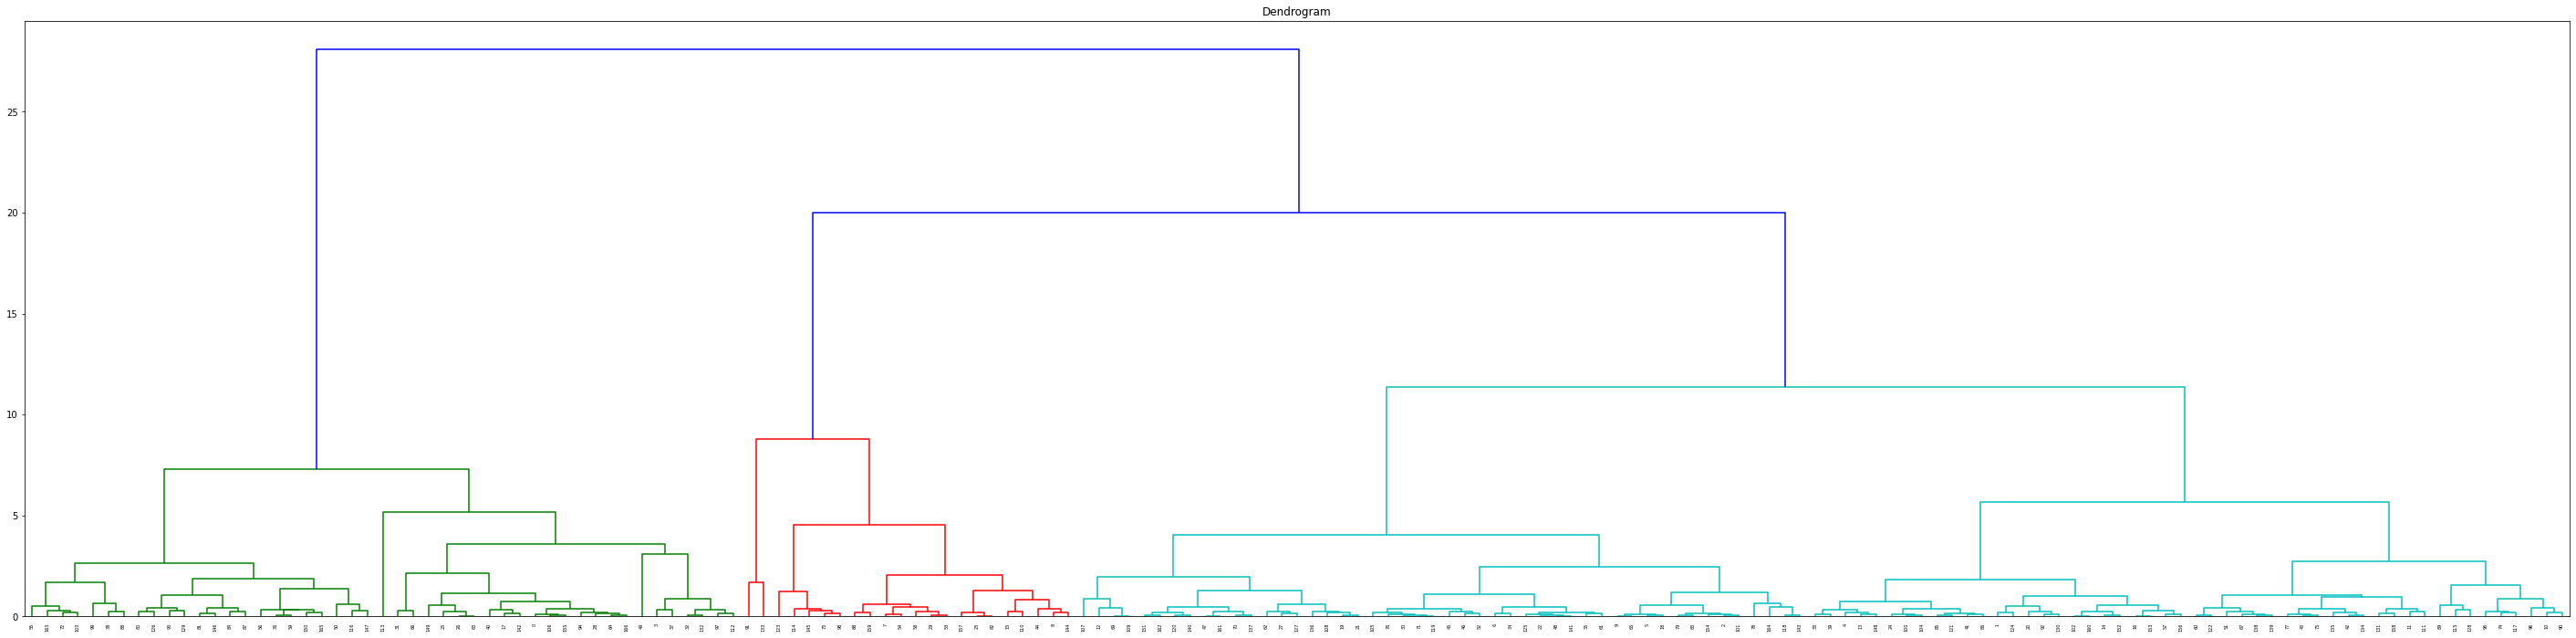

# 5.2 Getting labels from Agglomearative Hierarchical clustering
> > 

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(pca_data)
Y_hc = hcluster.labels_
pca_data['Pred_hc']= Y_hc


# 5.3 Visualizing output 

In [ ]:
sns.scatterplot(x='PC1',y='PC2',hue='Pred_hc',legend='full',data=pca_data,palette="muted")

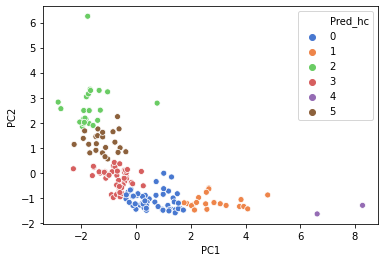

Countries represented by green dots and label(Pred_hc)=2 are the backward and needy countries to receive help from the NGO.

# 6. Saving Results

In [ ]:
country_data['Pred_hc']= Y_hc
country_data.to_csv('result.csv') 
